# Marketing Campaigns and customer segmentation 

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')



from sklearn.naive_bayes import GaussianNB #modiling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay 
from sklearn.metrics import roc_curve
from sklearn.metrics import multilabel_confusion_matrix,ConfusionMatrixDisplay


from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
## Obtain the data

In [21]:
#read data
marketing=pd.read_csv('marketing_campaign .csv')
df=marketing
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0    4/9/2012       58       635  ...             0   
1            1    8/3/2014       38        11  ...             0   
2            0  21-08-2013       26       426  ...             0   
3            0   10/2/2014       26        11  ...             0   
4            0  19-01-2014       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  13-06-2013       46       709  ...             0   
2236         1   10/6/2014       56       406  ...             0   
2237         0  25-01-2014       91       908  ...             1   
2238         1  24-01-2014        8       428  ...             0   
2239         1  15-10-2012       40        84  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
2235             0             0             0         0              3   
2236             0             1             0         0              3   
2237             0             0             0         0              3   
2238             0             0             0         0              3   
2239             0             0             0         0              3   

      Z_Revenue  Response  Column1  Column2  
0            11         1      635      NaN  
1            11         0       11      NaN  
2            11         0      426      NaN  
3            11         0       20      NaN  
4            11         0      173      NaN  
...         ...       ...      ...      ...  
2235         11         0      709      NaN  
2236         11         0      406      NaN  
2237         11         0      908      NaN  
2238         11         0      428      NaN  
2239         11         1       84      NaN  

[2240 rows x 31 columns]

## Show and describe the data

In [22]:
# Checking shape of dataset
print('Marketing Campaign dataset- rows:', df.shape[0],' columns:', df.shape[1])
df.shape# take a rough look over the dataset

Marketing Campaign dataset- rows: 2240  columns: 31


(2240, 31)

df.head()


In [23]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count      2240.000000  ...   2240.000000   2240.000000   2240.000000   
mean         37.525446  ...      0.074554      0.072768      0.064286   
std          54.628979  ...      0.262728      0.259813      0.245316   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%           3.000000  ...      0.000000      0.000000      0.000000   
50%          12.000000  ...      0.000000      0.000000      0.000000   
75%          50.000000  ...      0.000000      0.000000      0.000000   
max         259.000000  ...      1.000000      1.000000      1.000000   

       AcceptedCmp2     Complain  Z_CostContact  Z_Revenue     Response  \
count   2240.000000  2240.000000         2240.0     2240.0  2240.000000   
mean       0.013393     0.009375            3.0       11.0     0.149107   
std        0.114976     0.096391            0.0        0.0     0.356274   
min        0.000000     0.000000            3.0       11.0     0.000000   
25%        0.000000     0.000000            3.0       11.0     0.000000   
50%        0.000000     0.000000            3.0       11.0     0.000000   
75%        0.000000     0.000000            3.0       11.0     0.000000   
max        1.000000     1.000000            3.0       11.0     1.000000   

           Column1  Column2  
count  2240.000000      0.0  
mean    330.713839      NaN  
std     349.301542      NaN  
min       1.000000      NaN  
25%      30.000000      NaN  
50%     200.500000      NaN  
75%     546.250000      NaN  
max    1725.000000      NaN  

[8 rows x 28 columns]

In [24]:
## ‚ùì Missing values 

In [25]:
print(df.isnull().values.any())

True


In [26]:
#checking nulls
df.isna().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Column1                   0
Column2                2240
dtype: int64

In [27]:
Null_Vals= pd.isnull(df["Income"])

In [28]:
Null=df[Null_Vals]
Null  

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
10    15-11-2013       11         5  ...             0             0   
27    20-02-2013       19         5  ...             0             0   
43     5/11/2013       80        81  ...             0             0   
48      1/1/2014       96        48  ...             0             0   
58    17-06-2013       57        11  ...             0             0   
71    14-09-2012       25        25  ...             0             0   
90    19-11-2012        4       230  ...             0             0   
91    27-05-2014       45         7  ...             0             0   
92    23-11-2013       87       445  ...             0             0   
128    11/7/2013       23       352  ...             0             0   
133    11/8/2013       96       231  ...             0             0   
312     3/6/2013       69       861  ...             1             0   
319   23-08-2013       67       738  ...             1             0   
1379    1/4/2013       39       187  ...             0             0   
1382    3/9/2012       87        19  ...             0             0   
1383   12/1/2014       49         5  ...             0             0   
1386    2/3/2014       17        25  ...             0             0   
2059  18-05-2013       52       375  ...             0             0   
2061  31-05-2013       82        23  ...             0             0   
2078    3/3/2013       82        71  ...             0             0   
2079  23-06-2013       83       161  ...             0             0   
2081  18-10-2013       95       264  ...             0             0   
2084  30-10-2013       75       532  ...             0             1   
2228   12/8/2012       53        32  ...             1             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
10               0             0         0              3         11   
27               0             0      

In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')

# fit on the dataset

imputer.fit(df[['Income','ID','Recency']])

KNNImputer()

In [31]:
# transform the dataset
X = imputer.transform(df[['Income','ID','Recency']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','Edu_years'])
df['Income']=Income_impute['Income'].reset_index(drop=True)
df.isnull().sum()

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Column1                   0
Column2                2240
dtype: int64

In [32]:
Null=df[Null_Vals]
Null 

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
10     1994        1983  Graduation        Married  41265.6        1   
27     5255        1986  Graduation         Single  53062.4        1   
43     7281        1959         PhD         Single  54307.8        0   
48     7244        1951  Graduation         Single  47259.6        2   
58     8557        1982  Graduation         Single  64794.4        1   
71    10629        1973    2n Cycle        Married  44311.2        1   
90     8996        1957         PhD        Married  42712.2        2   
91     9235        1957  Graduation         Single  59038.4        1   
92     5798        1973      Master       Together  61125.0        0   
128    8268        1961         PhD        Married  50454.0        0   
133    1295        1963  Graduation        Married  43487.8        0   
312    2437        1989  Graduation        Married  36049.4        0   
319    2863        1970  Graduation         Single  52084.0        1   
1379  10475        1970      Master       Together  78393.4        0   
1382   2902        1958  Graduation       Together  60762.2        1   
1383   4345        1964    2n Cycle         Single  50705.6        1   
1386   3769        1972         PhD       Together  52812.2        1   
2059   7187        1969      Master       Together  65044.4        1   
2061   1612        1981         PhD         Single  52329.0        1   
2078   5079        1971  Graduation        Married  45153.8        1   
2079  10339        1954      Master       Together  47983.8        0   
2081   3117        1955  Graduation         Single  59510.2        0   
2084   5250        1943      Master          Widow  42433.0        0   
2228   8720        1978    2n Cycle       Together  59349.4        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
10           0  15-11-2013       11         5  ...             0   
27           0  20-02-2013       19         5  ...             0   
43           0   5/11/2013       80        81  ...             0   
48           1    1/1/2014       96        48  ...             0   
58           0  17-06-2013       57        11  ...             0   
71           0  14-09-2012       25        25  ...             0   
90           1  19-11-2012        4       230  ...             0   
91           1  27-05-2014       45         7  ...             0   
92           0  23-11-2013       87       445  ...             0   
128          1   11/7/2013       23       352  ...             0   
133          1   11/8/2013       96       231  ...             0   
312          0    3/6/2013       69       861  ...             1   
319          2  23-08-2013       67       738  ...             1   
1379         1    1/4/2013       39       187  ...             0   
1382         1    3/9/2012       87        19  ...             0   
1383         1   12/1/2014       49         5  ...             0   
1386         0    2/3/2014       17        25  ...             0   
2059         1  18-05-2013       52       375  ...             0   
2061         0  31-05-2013       82        23  ...             0   
2078         1    3/3/2013       82        71  ...             0   
2079         1  23-06-2013       83       161  ...             0   
2081         1  18-10-2013       95       264  ...             0   
2084         0  30-10-2013       75       532  ...             0   
2228         0   12/8/2012       53        32  ...             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
10               0             0             0         0              3   
27               0             0             0         0              3   
43               0             0             0         0              3   
48               0             0             0         0              3   
58               0             0             0         0              3   
71               0             0             0         0 

In [33]:
## üîé Outlier Detection 


In [34]:
def remove_outliers(variable,name):
  
     Q1 = variable.quantile(0.25)
     Q3 = variable.quantile(0.75)
     IQR= Q3-Q1

     Print('Quartile 1 for',name,'Is :',Q1 )
     Print('Quartile 3 for',name,'Is :',Q3)
     print('Inquartie range for',name,'Is :',IQR)
  
     lower_limit = round(Q1 - 1.5 * IQR)
     upper_limit = round(Q3 + 1.5 * IQR)

     Print('lower_limit')
     Print('upper_limit ')
        
     outliers = [x for x in variable if x < lower_limit or x > upper_limit] 
     print ("Outlier values for ",name," are: ", outliers)

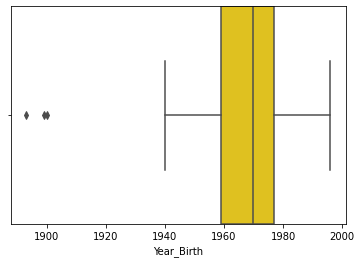

In [35]:
sns.boxplot(df['Year_Birth'],width=1,color='gold')

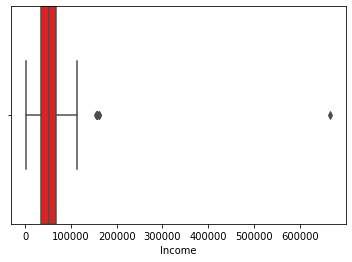

In [36]:
sns.boxplot(df['Income'],width=1,color='red')

In [37]:
## Handling Outliers

In [38]:
#removing outliers from the column 'Year_Birth'
df=df.drop(df[df['Year_Birth']<=1900].index)
#Let's remove outliers from the columns 'Income'
df=df.drop(df[df['Income']>600000].index)

## EDA

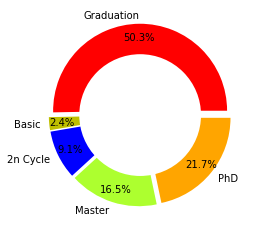

In [39]:
import matplotlib.pyplot as plt
sizes = [50.3 , 2.4 ,9.1 ,16.5 ,21.7]
  
# Setting labels for items in Chart
labels = ['Graduation', 'Basic', '2n Cycle', 'Master',
          'PhD']
  
# colors
colors = ['r', 'y', 'b', '#ADFF2F',
          '#FFA500']
  
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  

  
# Displaying Chart
plt.show()

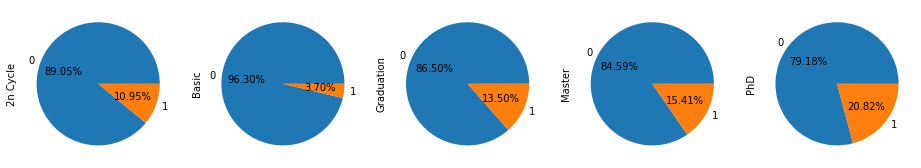

In [40]:
# see the response rate according to education
pd.crosstab(index=df['Response'], columns=df['Education']).plot(kind="pie",figsize=(16, 8),subplots=True,autopct='%1.2f%%',legend=False)
plt.show()

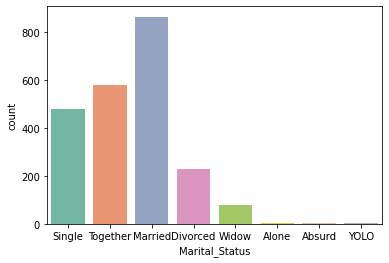

In [41]:
sns.countplot(df['Marital_Status'], palette = "Set2",linewidth=3)

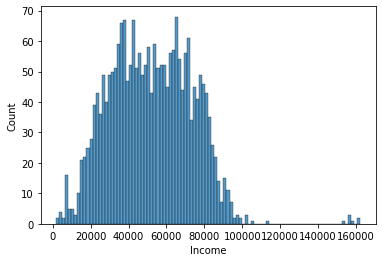

In [42]:
sns.histplot(df, x="Income", multiple="dodge",bins=100)

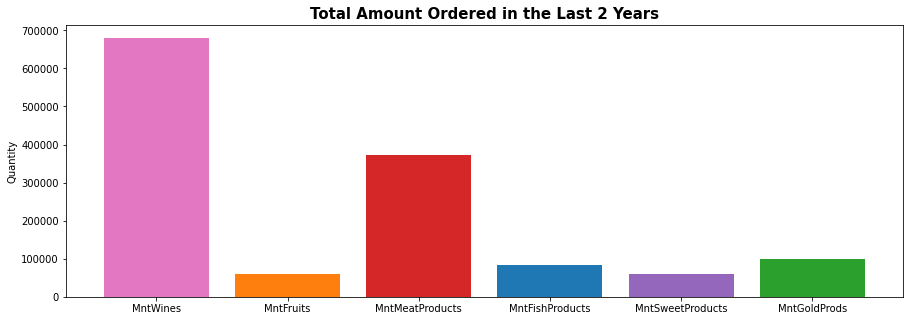

In [43]:
product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

fig = plt.figure(figsize=(15,5))
colors = ['tab:pink','tab:orange','tab:red','tab:blue','tab:purple','tab:green']
plt.bar(x=product_cols,
        height=df[product_cols].sum(),
        color=colors)
plt.title("Total Amount Ordered in the Last 2 Years", fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel("Quantity")

plt.show()

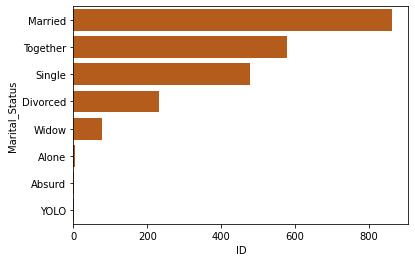

In [44]:
#customer distribution by marital status
MaritalS=df[['Marital_Status','ID']].groupby(by='Marital_Status', as_index=False).nunique().sort_values('ID', ascending=False)

f, ax=plt.subplots(figsize=(6,4))
sns.barplot(x=MaritalS['ID'],y=MaritalS['Marital_Status'], color='#cc5803')

In [45]:
##  DeLeting un necessary columns 

In [46]:
df.drop(['ID','Z_CostContact','Z_Revenue','Dt_Customer'],axis='columns',inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2236 non-null   float64
 4   Kidhome              2236 non-null   int64  
 5   Teenhome             2236 non-null   int64  
 6   Recency              2236 non-null   int64  
 7   MntWines             2236 non-null   int64  
 8   MntFruits            2236 non-null   int64  
 9   MntMeatProducts      2236 non-null   int64  
 10  MntFishProducts      2236 non-null   int64  
 11  MntSweetProducts     2236 non-null   int64  
 12  MntGoldProds         2236 non-null   int64  
 13  NumDealsPurchases    2236 non-null   int64  
 14  NumWebPurchases      2236 non-null   int64  
 15  NumCatalogPurchases  2236 non-null   i

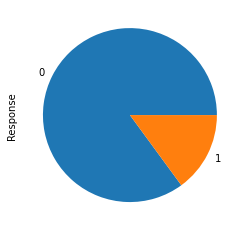

In [48]:
df.Response.value_counts().plot.pie()

In [49]:
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0          58       635         88              546  ...                  7   
1          38        11          1                6  ...                  5   
2          26       426         49              127  ...                  4   
3          26        11          4               20  ...                  6   
4          94       173         43              118  ...                  5   
...       ...       ...        ...              ...  ...                ...   
2235       46       709         43              182  ...                  5   
2236       56       406          0               30  ...                  7   
2237       91       908         48              217  ...                  6   
2238        8       428         30              214  ...                  3   
2239       40        84          3               61  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Response  Column1  Column2  
0            0         1      635      NaN  
1            0         0       11      NaN  
2            0         0      426      NaN  
3            0         0       20      NaN  
4            0         0      173      NaN  
...        ...       ...      ...      ...  
2235         0         0      709      NaN  
2236         0         0      406      NaN  
2237         0         0      908      NaN  
2238         0         0      428      NaN  
2239         0         1       84      NaN  

[2236 rows x 27 columns]

In [50]:
df=df.replace("Married", "Have Partner")
df=df.replace("Together", "Have Partner")
df=df.replace("Single", "Dont have a Partner")
df=df.replace("Alone", "Dont have a Partner")
df=df.replace("Divorced", "Dont have a Partner")
df=df.replace("Widow", "Dont have a Partner")
df=df.replace("Absurd", "Dont have a Partner")
df=df.replace("YOLO", "Dont have a Partner")

In [51]:
df['Marital_Status'].value_counts()

Have Partner           1442
Dont have a Partner     794
Name: Marital_Status, dtype: int64

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue ='Response')

Output hidden; open in https://colab.research.google.com to view.

split data

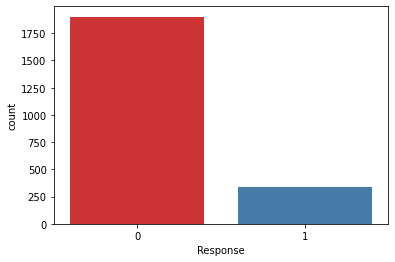

In [54]:
sns.countplot(df['Response'], palette = "Set1",linewidth=3)

In [55]:
X = df.drop('Response', axis=1)
y = df['Response'].values
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)


yy_train=pd.DataFrame(yy_train)

In [ ]:
yy_train=pd.DataFrame(yy_train)

In [59]:
yy_train.value_counts()

AttributeError: ignored

In [57]:

XX_train.shape

(1788, 26)

In [58]:
XX_test.shape

(448, 26)

In [60]:
XX_train.shape

(1788, 26)

## üõ† Encoding 

In [61]:
data_after_encoding=pd.get_dummies(XX_train)

In [67]:
data_after_encoding

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1648        1967  57136.0        0         0       18       267        140   
403         1960  30507.0        0         0       29        65         36   
1522        1976  37697.0        1         0       82        34          6   
1815        1983  21840.0        1         0       80        17          0   
660         1963  56253.0        0         1       83       509          0   
...          ...      ...      ...       ...      ...       ...        ...   
155         1949  69372.0        0         0       10       997         26   
1699        1951  73705.0        0         2       86       612         91   
1004        1954  36930.0        0         1       50       223          2   
928         1993  74293.0        0         0       66       375        152   
1409        1953  36957.0        1         1       43       100          2   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
1648              599               34                12  ...         0   
403                74               38                20  ...         0   
1522               21               11                 4  ...         0   
1815                9                0                 0  ...         0   
660                65                7                11  ...         0   
...               ...              ...               ...  ...       ...   
155               269               34                13  ...         0   
1699              520              258               107  ...         0   
1004               31                0                 2  ...         0   
928               335               93                91  ...         0   
1409               16                2                 1  ...         0   

      Column1  Column2  Education_2n Cycle  Education_Basic  \
1648      599      NaN                   0                0   
403       110      NaN                   0                0   
1522       34      NaN                   0                0   
1815       17      NaN                   0                0   
660       509      NaN                   0                0   
...       ...      ...                 ...              ...   
155       997      NaN                   0                0   
1699      612      NaN                   0                0   
1004      223      NaN                   0                0   
928       375      NaN                   0                0   
1409      100      NaN                   0                0   

      Education_Graduation  Education_Master  Education_PhD  \
1648                     1                 0              0   
403                      1                 0              0   
1522                     1                 0              0   
1815                     0                 0              1   
660                      1                 0              0   
...                    ...               ...            ...   
155                      1                 0              0   
1699                     0                 1              0   
1004                     0                 0              1   
928                      1                 0              0   
1409                     0                 0              1   

      Marital_Status_Dont have a Partner  Marital_Status_Have Partner  
1648                                   1                            0  
403                                    0                            1  
1522                                   1                            0  
1815                                   0                            1  
660                                    0                            1  
...                                  ...                          ...  
155                                    0                            1  
1699                                   1                            0  
1004  

In [79]:
datatest_after_encoding=pd.get_dummies(XX_test)

In [80]:
datatest_after_encoding

Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1518        1972  37787.0        1         0       50        40          1   
178         1959  38285.0        2         1       96         2          0   
235         1975  22212.0        1         0       49         5          9   
1429        1972  31907.0        0         0       75        33         87   
1327        1975  45503.0        1         0       54        97          4   
...          ...      ...      ...       ...      ...       ...        ...   
369         1975  52614.0        0         1       63       789          0   
963         1975  40233.0        0         1       84        80          4   
1698        1957  41437.0        1         1        5        29          0   
1189        1974  45894.0        0         2       15        27          2   
1384        1973  20895.0        1         0       24        18          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
1518               40                4                 3  ...         0   
178                 5                2                 0  ...         0   
235                20                6                 8  ...         0   
1429               64              175                16  ...         0   
1327               44                6                 1  ...         0   
...               ...              ...               ...  ...       ...   
369               142               12                 9  ...         0   
963                46                0                17  ...         0   
1698                2                0                 0  ...         0   
1189                7                0                 2  ...         0   
1384               17                3                 0  ...         0   

      Column1  Column2  Education_2n Cycle  Education_Basic  \
1518       40      NaN                   0                0   
178         5      NaN                   0                0   
235        21      NaN                   1                0   
1429      175      NaN                   0                0   
1327       97      NaN                   0                0   
...       ...      ...                 ...              ...   
369       789      NaN                   0                0   
963        80      NaN                   0                0   
1698       29      NaN                   0                0   
1189       27      NaN                   1                0   
1384       18      NaN                   0                0   

      Education_Graduation  Education_Master  Education_PhD  \
1518                     0                 1              0   
178                      1                 0              0   
235                      0                 0              0   
1429                     1                 0              0   
1327                     0                 0              1   
...                    ...               ...            ...   
369                      0                 0              1   
963                      0                 0              1   
1698                     0                 0              1   
1189                     0                 0              0   
1384                     1                 0              0   

      Marital_Status_Dont have a Partner  Marital_Status_Have Partner  
1518                                   0                            1  
178                                    0                            1  
235                                    0                            1  
1429                                   1                            0  
1327                                   0                            1  
...                                  ...                          ...  
369                                    1                            0  
963                                    0                            1  
1698  

In [81]:
datatest_after_encoding.dtypes

Year_Birth                              int64
Income                                float64
Kidhome                                 int64
Teenhome                                int64
Recency                                 int64
MntWines                                int64
MntFruits                               int64
MntMeatProducts                         int64
MntFishProducts                         int64
MntSweetProducts                        int64
MntGoldProds                            int64
NumDealsPurchases                       int64
NumWebPurchases                         int64
NumCatalogPurchases                     int64
NumStorePurchases                       int64
NumWebVisitsMonth                       int64
AcceptedCmp3                            int64
AcceptedCmp4                            int64
AcceptedCmp5                            int64
AcceptedCmp1                            int64
AcceptedCmp2                            int64
Complain                          

In [86]:
data_after_encoding.isnull().sum()

Year_Birth                               0
Income                                   0
Kidhome                                  0
Teenhome                                 0
Recency                                  0
MntWines                                 0
MntFruits                                0
MntMeatProducts                          0
MntFishProducts                          0
MntSweetProducts                         0
MntGoldProds                             0
NumDealsPurchases                        0
NumWebPurchases                          0
NumCatalogPurchases                      0
NumStorePurchases                        0
NumWebVisitsMonth                        0
AcceptedCmp3                             0
AcceptedCmp4                             0
AcceptedCmp5                             0
AcceptedCmp1                             0
AcceptedCmp2                             0
Complain                                 0
Column1                                  0
Column2    

In [85]:
df_smote= SMOTE(random_state=0)
df_under = RandomUnderSampler(random_state=0)
df_over = RandomOverSampler(random_state=0)
X_smote, y_smote = df_smote.fit_resample(data_after_encoding, yy_train)
X_under, y_under = df_under.fit_resample(data_after_encoding, yy_train)
X_oversampled, y_oversampled = df_over.fit_resample(data_after_encoding, yy_train)

ValueError: ignored

In [ ]:
y_smote=pd.DataFrame(y_smote)

In [ ]:
y_under=pd.DataFrame(y_under)

In [ ]:
y_oversampled=pd.DataFrame(y_oversampled)

In [ ]:
y_oversampled.value_counts()

In [ ]:
## robust_scaler

In [ ]:
from sklearn.preprocessing import y_oversampled.value_counts()

In [ ]:
robust_scaler1 = RobustScaler()
robust_scaler2 = RobustScaler()
robust_scaler3 = RobustScaler()


df_sm = robust_scaler1.fit_transform(X_smote)
df_ud = robust_scaler2.fit_transform(X_under)
df_od = robust_scaler3.fit_transform(X_oversampled)

In [ ]:
df___sm = robust_scaler1.transform(datatest_after_encoding)
df___ud = robust_scaler2.transform(datatest_after_encoding)
df___od = robust_scaler3.transform(datatest_after_encoding)

In [ ]:
def rocplot(y,pred):
    logit_roc_auc = roc_auc_score(y,pred)
    fpr, tpr, thresholds = roc_curve(y, pred )
    logit_roc_auc
    plt.figure()
    plt.plot(fpr, tpr, label='NB (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [ ]:
def confusion(y,pred):
    cf_matrix = confusion_matrix(y,pred)
    disp=ConfusionMatrixDisplay(cf_matrix)
    disp.plot(include_values=True, cmap="GnBu", ax=None, xticks_rotation="vertical")
    plt.show()

## Gradient Boosting

In [ ]:
prams= {'loss':['log_loss', 'deviance', 'exponential'], 'n_estimators':[100,1000],'criterion':['friedman_mse', 'squared_error', 'mse']}
gr=GradientBoostingClassifier()
clf = GridSearchCV(gr, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 1000}
0.9051282051282051


Training Accuracy :	  1.0
Testing Accuracy :	   0.993
recall Accuracy :	   0.9222222222222223
Confusion matrix:
  [[910   0]
 [  7  83]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       910
           1       1.00      0.92      0.96        90

    accuracy                           0.99      1000
   macro avg       1.00      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       910
           1       1.00      0.92      0.96        90

    accuracy                           0.99      1000
   macro avg       1.00      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Area under the curve:  0.9611111111111111


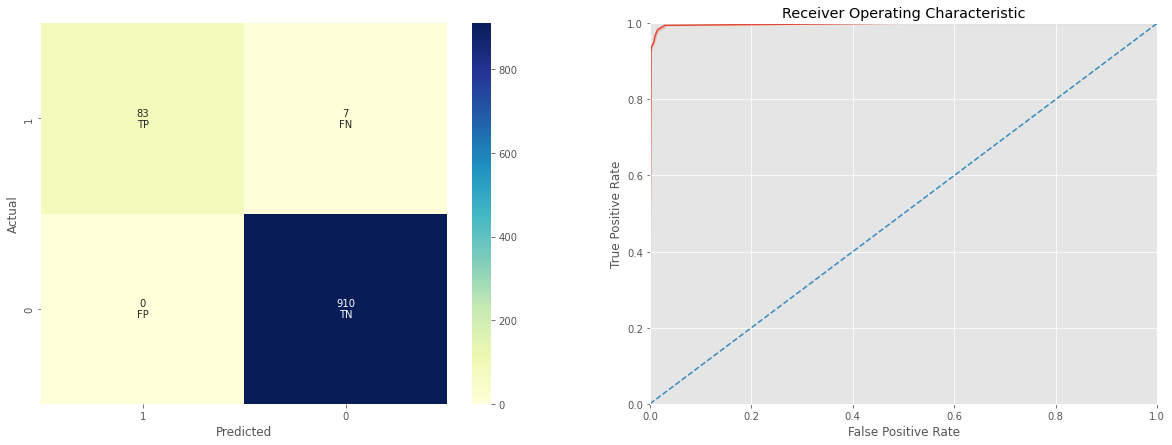

In [ ]:
gr  = GradientBoostingClassifier(loss ='deviance' ,n_estimators=1000 ,criterion= 'friedman_mse', random_state=0)
gr.fit(X_train,y_train)
evalution (gr,X_train, X_test, y_train, y_test )
personal_loan_prediction("Gradient Boosting", gr, X_train, X_test, y_train, y_test, plot = True)

## Neural Network

In [ ]:
prams= {'activation':['identity', 'logistic', 'tanh', 'relu'], 'batch_size':[10,1000],'hidden_layer_sizes':[10,1000],
        'solver':['lbfgs', 'sgd', 'adam'], 'learning_rate':['constant', 'invscaling', 'adaptive']}
mlp=MLPClassifier()
clf = GridSearchCV(mlp, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'solver': 'adam'}
0.8948717948717949


In [ ]:
mlp=MLPClassifier(activation='logistic',batch_size= 10,solver= 'adam', hidden_layer_sizes= 100,learning_rate= 'invscaling' ,random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=100,
              learning_rate='invscaling', random_state=0)

Training Accuracy :	  0.9855
Testing Accuracy :	   0.98
recall Accuracy :	   0.8777777777777778
Confusion matrix:
  [[901   9]
 [ 11  79]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.90      0.88      0.89        90

    accuracy                           0.98      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.90      0.88      0.89        90

    accuracy                           0.98      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Area under the curve:  0.933943833943834


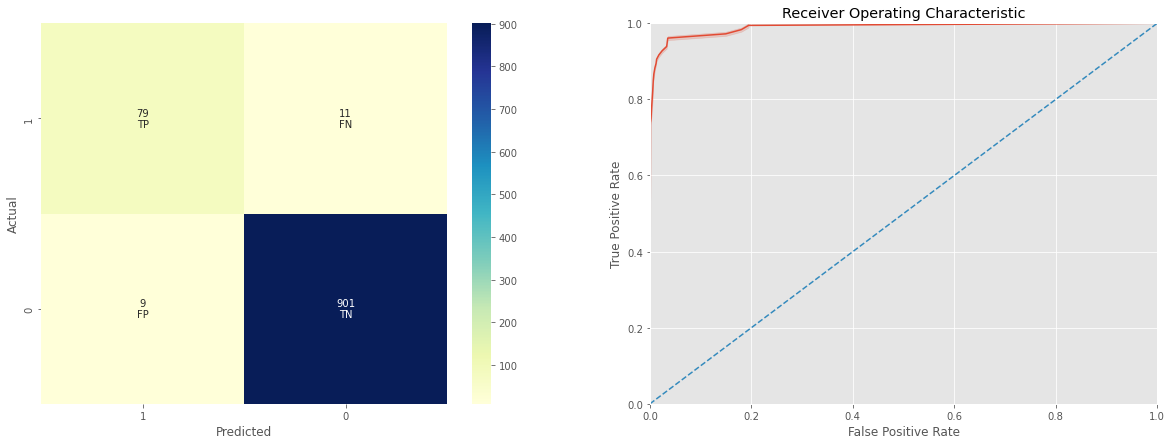

In [ ]:
evalution (mlp,X_train, X_test, y_train, y_test )
personal_loan_prediction("Neural network", mlp, X_train, X_test, y_train, y_test, plot = True)

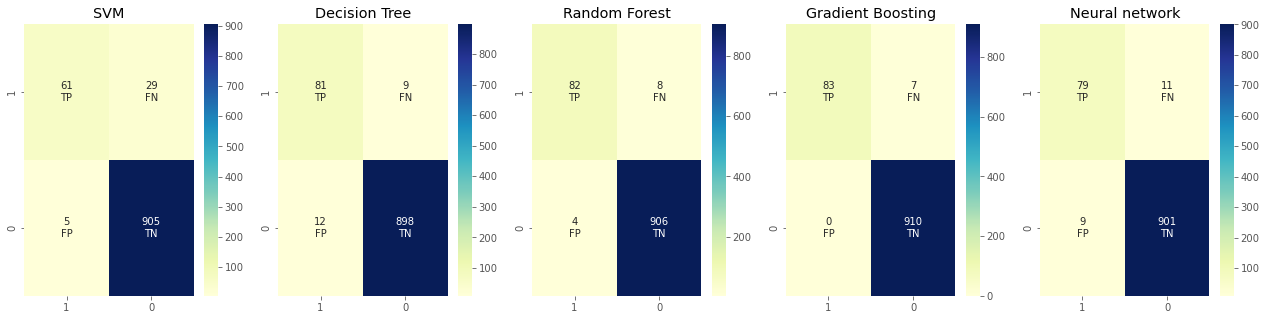

In [ ]:

#Plotting the confusion matrix for all our models
import math
fig, axes = plt.subplots(1,5, figsize = (22, 5))

cnt = 0
for c in range(5):
    try:
        conf_matrix = np.flip(list(conf_matrix_all.values())[cnt])
        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)

        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[c], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
        axes[c].set(title=list(conf_matrix_all.keys())[cnt])
        cnt += 1
    except:
        pass

## handling imbalanced in data effect

In [ ]:
sm = SMOTE(random_state=1)
X_sm_train , y_sm_train = sm.fit_resample(X_train,y_train)

## Support Vector Machine Modified

In [ ]:
svm= SVC(kernel = 'linear',C= 5, gamma= 'scale', random_state = 0)
svm.fit(X_sm_train,y_sm_train)

SVC(C=5, kernel='linear', random_state=0)

In [ ]:
evalution (svm,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  0.9216066481994459
Testing Accuracy :	   0.924
recall Accuracy :	   0.8777777777777778
Confusion matrix:
  [[845  65]
 [ 11  79]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       910
           1       0.55      0.88      0.68        90

    accuracy                           0.92      1000
   macro avg       0.77      0.90      0.82      1000
weighted avg       0.95      0.92      0.93      1000



0.8777777777777778

## Decision Tree Classifier

In [ ]:
tree_class = DecisionTreeClassifier(criterion='gini', max_depth=20, splitter='best', random_state=0)
tree_class.fit(X_sm_train, y_sm_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [ ]:
evalution (tree_class,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  1.0
Testing Accuracy :	   0.98
recall Accuracy :	   0.9222222222222223
Confusion matrix:
  [[897  13]
 [  7  83]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.86      0.92      0.89        90

    accuracy                           0.98      1000
   macro avg       0.93      0.95      0.94      1000
weighted avg       0.98      0.98      0.98      1000



0.9222222222222223

## Random Forest Classifier


In [ ]:
Random_class = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=20, random_state = 0)
Random_class.fit(X_sm_train, y_sm_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=40,
                       random_state=0)

In [ ]:
evalution (Random_class,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  0.9998614958448754
Testing Accuracy :	   0.988
recall Accuracy :	   0.9111111111111111
Confusion matrix:
  [[906   4]
 [  8  82]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.91      0.93        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000



0.9111111111111111

## Gradient Boosting

In [ ]:
gr  = GradientBoostingClassifier(loss ='deviance' ,n_estimators=1000 ,criterion= 'friedman_mse', random_state=0)
gr.fit(X_sm_train, y_sm_train)


GradientBoostingClassifier(n_estimators=1000, random_state=0)

In [ ]:
evalution (gr,X_sm_train, X_test, y_sm_train, y_test)

Training Accuracy :	  1.0
Testing Accuracy :	   0.99
recall Accuracy :	   0.9333333333333333
Confusion matrix:
  [[906   4]
 [  6  84]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.93      0.94        90

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



0.9333333333333333

## Neural Network

In [ ]:
mlp=MLPClassifier(activation='logistic',batch_size= 100,solver= 'adam' ,random_state=1, max_iter=300)
mlp.fit(X_sm_train, y_sm_train)

MLPClassifier(activation='logistic', batch_size=100, max_iter=300,
              random_state=1)

In [ ]:
mlp=MLPClassifier(activation='logistic',batch_size= 10,solver= 'adam', hidden_layer_sizes= 100,learning_rate= 'invscaling' ,random_state=0)
mlp.fit(X_sm_train, y_sm_train)

MLPClassifier(random_state=0)

In [ ]:
evalution (mlp,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  0.9685595567867036
Testing Accuracy :	   0.97
recall Accuracy :	   0.8555555555555555
Confusion matrix:
  [[893  17]
 [ 13  77]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       910
           1       0.82      0.86      0.84        90

    accuracy                           0.97      1000
   macro avg       0.90      0.92      0.91      1000
weighted avg       0.97      0.97      0.97      1000



0.8555555555555555